In [1]:
import schemdraw
from schemdraw import flow

Undefined Element <Element 'mstyle' at 0x0000026827784A90>


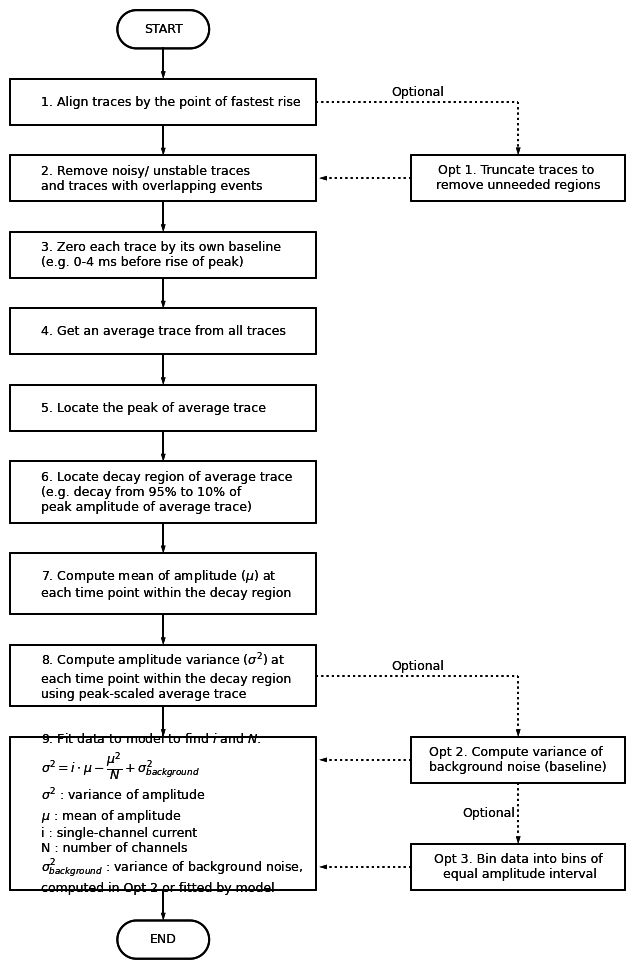

In [30]:
with schemdraw.Drawing(file='nsfa_flowchart.svg') as d:
    
    # Start
    d += flow.Start().label('START')
    d += flow.Arrow().down(d.unit/3)
    
    # Process 1 to 7
    d += (p1 := flow.Process(w=10, h=1.5).label('1. Align traces by the point of fastest rise', ofst=[-9, 0], loc='right'))
    d += flow.Arrow().down(d.unit/3)
    d += (p2 := flow.Process(w=10, h=1.5).label('2. Remove noisy/ unstable traces \nand traces with overlapping events', ofst=[-9, 0], loc='right'))
    d += flow.Arrow().down(d.unit/3)
    d += (p3 := flow.Process(w=10, h=1.5).label('3. Zero each trace by its own baseline \n(e.g. 0-4 ms before rise of peak)', ofst=[-9, 0], loc='right'))
    d += flow.Arrow().down(d.unit/3)
    d += (p4 := flow.Process(w=10, h=1.5).label('4. Get an average trace from all traces', ofst=[-9, 0], loc='right'))
    d += flow.Arrow().down(d.unit/3)
    d += (p5 := flow.Process(w=10, h=1.5).label('5. Locate the peak of average trace', ofst=[-9, 0], loc='right'))
    d += flow.Arrow().down(d.unit/3)
    d += (p6 := flow.Process(w=10, h=2).label('6. Locate decay region of average trace\n(e.g. decay from 95% to 10% of \npeak amplitude of average trace)', ofst=[-9, 0], loc='right'))
    d += flow.Arrow().down(d.unit/3)
    d += (p7 := flow.Process(w=10, h=2).label('7. Compute mean of amplitude ($\u03BC$) at \neach time point within the decay region', ofst=[-9, 0], loc='right'))
    d += flow.Arrow().down(d.unit/3)
    d += (p8 := flow.Process(w=10, h=2).label('8. Compute amplitude variance ($\u03C3^2$) at' 
                                                '\neach time point within the decay region' 
                                                '\nusing peak-scaled average trace', ofst=[-9, 0], loc='right'))
    d += flow.Arrow().down(d.unit/3)
    d += (p9 := flow.Process(w=10, h=5).label(['9. Fit data to model to find $i$ and $N$:'
                                               '\n$\u03C3^2 = i\cdot\u03BC - \dfrac{\u03BC^2}{N} + \u03C3_{background}^2$'
                                               '\n$\u03C3^2$ : variance of amplitude'                                               
                                               '\n$\u03BC$ : mean of amplitude'
                                               '\ni : single-channel current'
                                               '\nN : number of channels'
                                               '\n$\u03C3_{background}^2$ : variance of background noise,'
                                               '\ncomputed in Opt 2 or fitted by model'], ofst=[-9, 0], loc='right'))
    d += flow.Arrow().down(d.unit/3)

    # End
    d += flow.Terminal().label('END')
    
    # Option 1
    d += flow.Line(ls=':').right(d.unit*2.2).at(p1.E).label('Optional')
    d += flow.Arrow(ls=':').down(d.unit*0.58)
    d += (opt1 := flow.Process(w=7, h=1.5).anchor('N').label('Opt 1. Truncate traces to \nremove unneeded regions'))
    d += flow.Arrow(ls=':').left(d.unit).at(opt1.W)
    
    # Option 2
    d += flow.Line(ls=':').right(d.unit*2.2).at(p8.E).label('Optional')
    d += flow.Arrow(ls=':').down(d.unit/1.5)
    d += (opt2 := flow.Process(w=7, h=1.5).anchor('N').label('Opt 2. Compute variance of \nbackground noise (baseline)'))
    d += flow.Arrow(ls=':').left(d.unit).at(opt2.W)
    
    # Option 3
    d += flow.Arrow(ls=':').down(d.unit/1.5).at(opt2.S).label('Optional')
    d += (opt3 := flow.Process(w=7, h=1.5).anchor('N').label('Opt 3. Bin data into bins of\n equal amplitude interval'))
    d += flow.Arrow(ls=':').left(d.unit).at(opt3.W)
